In [ ]:
%pip install pyproj matplotlib geopy

In [1]:
# Input Parameters as interactive widgets
import ipywidgets as widgets


# Latitude and Longitude
latitude = widgets.FloatText(value=35.172387, description='Latitude:')
longitude = widgets.FloatText(value=-84.308996, description='Longitude:')

# UTM Coordinates
northing = widgets.FloatText(value=3895477.44, description='Northing:')
easting = widgets.FloatText(value=745073.61, description='Easting:')
zone_number = widgets.IntText(value=16, description='Zone Number:')
zone_letter = widgets.Text(value='S', description='Zone Letter:')

# Display the widgets
display(latitude, longitude, northing, easting, zone_number, zone_letter)


FloatText(value=35.172387, description='Latitude:')

FloatText(value=-84.308996, description='Longitude:')

FloatText(value=3895477.44, description='Northing:')

FloatText(value=745073.61, description='Easting:')

IntText(value=16, description='Zone Number:')

Text(value='S', description='Zone Letter:')

In [2]:
# get the values from the widgets
latitude = latitude.value
longitude = longitude.value
northing = northing.value
easting = easting.value
zone_number = zone_number.value
zone_letter = zone_letter.value

In [14]:
from pyproj import CRS, Transformer

# Define CRS for WGS84 and UTM Zone 16S
crs_wgs = CRS.from_epsg(4326)  # WGS84
zone_letter = '+south' if zone_letter.upper() == 'S' else '+north'
crs_utm = CRS.from_proj4(
    f'+proj=utm +zone={zone_number} {zone_letter} +datum=WGS84 +units=m +no_defs')

# Transformer for UTM to WGS84
transformer = Transformer.from_crs(crs_utm, crs_wgs, always_xy=True)

# Convert UTM to lat/lon
longitude_converted, latitude_converted = transformer.transform(
    easting, northing)

In [15]:
print('Original Coordinates:')
print(longitude, latitude)
print('Converted Coordinates:')
print(longitude_converted, latitude_converted)

Original Coordinates:
-84.308996 35.172387
Converted Coordinates:
-84.30898934346126 35.1723905576009


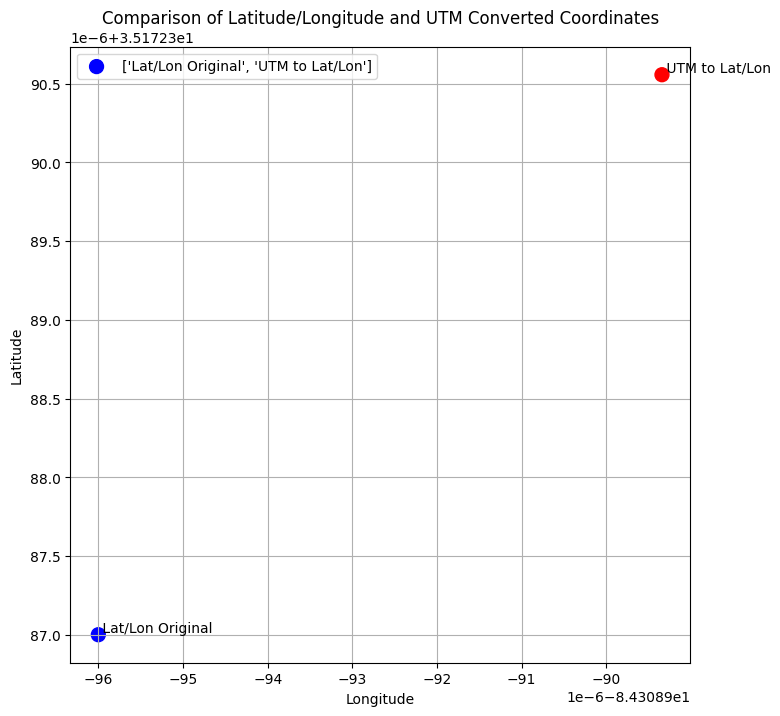

In [16]:
import matplotlib.pyplot as plt

# Define the points
points = {
    'Lat/Lon Original': (longitude, latitude),
    'UTM to Lat/Lon': (longitude_converted, latitude_converted)
}

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(*zip(*points.values()), s=100,
           color=['blue', 'red'], label=list(points.keys()))
ax.set_title('Comparison of Latitude/Longitude and UTM Converted Coordinates')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.grid(True)

# Label the points
for point, (lon, lat) in points.items():
    ax.text(lon, lat, ' ' + point, verticalalignment='bottom')

plt.legend()
plt.show()

In [17]:
from geopy.distance import geodesic
# compute the distance between UTM, LatLong coordinates

# Re-check the conversion using pyproj with the correct UTM zone setting (north instead of south)
crs_utm_north = CRS.from_proj4(
    f'+proj=utm +zone={zone_number} +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs')

# Transformer for UTM (north) to WGS84
transformer_north = Transformer.from_crs(
    crs_utm_north, crs_wgs, always_xy=True)

# Convert UTM (north) to lat/lon again
longitude_converted_north, latitude_converted_north = transformer_north.transform(
    easting, northing)

# Recalculate the distance between the original and correctly converted points
distance_meters_correct = geodesic(
    (latitude, longitude), (latitude_converted_north, longitude_converted_north)).meters
distance_meters_correct

0.7235240319239261